# ResNet Architecture
        ** At the ILSVRC 2015, the so-called Residual Neural Network (ResNet) by Kaiming He et al introduced anovel architecture with “skip connections” and features 
        heavy batch normalization. Such skip connections are also known as gated units or gated recurrent units and have a strong similarity to recent successful 
        elements applied in RNNs. Thanks to this technique they were able to train a NN with 152 layers while still having lower complexity than VGGNet. It achieves a 
        top-5 error rate of 3.57% which beats human-level performance on this dataset.**
        

2 directories in each of the segment

In [1]:
import os
os.listdir('../input/chest-xray-pneumonia/chest_xray/train/')

['PNEUMONIA', 'NORMAL']

In [2]:
os.listdir('../input/chest-xray-pneumonia/chest_xray/val/')

['PNEUMONIA', 'NORMAL']

In [3]:
os.listdir('../input/chest-xray-pneumonia/chest_xray/test/')

['PNEUMONIA', 'NORMAL']

**Import all the directories **

In [4]:
train_dir='../input/chest-xray-pneumonia/chest_xray/train/'
test_dir='../input/chest-xray-pneumonia/chest_xray/test/'
val_dir='../input/chest-xray-pneumonia/chest_xray/val/'

In [5]:
# train 
os.listdir(train_dir)
train_n = train_dir+'NORMAL/'
train_p = train_dir+'PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-1040-0001.jpeg
pneumonia picture title: person325_virus_664.jpeg


Text(0.5, 1.0, 'Pneumonia')

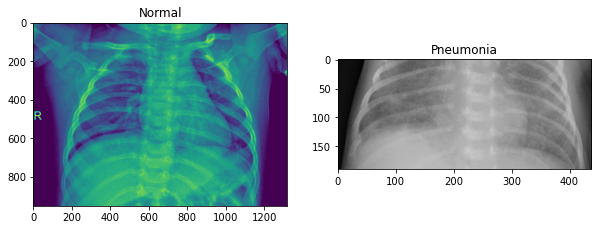

In [6]:
#Normal pic 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

We don't have as much images for training ,so we use data augmentation technique

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Preprocessing 

**Normally in all the previous architectures like vgg16 ,vgg19,Alexnet. We uses (rescale=1/255 ) technique.So i am using that technique here also.**

In [8]:
train_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
training_generator=train_generator.flow_from_directory(train_dir,target_size=(224,224),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [9]:
val_generator=ImageDataGenerator(rescale=1/255.0)
validation_generator=val_generator.flow_from_directory(val_dir,target_size=(224,224),batch_size=12,class_mode='binary')

Found 16 images belonging to 2 classes.


In [10]:
test_generator=ImageDataGenerator(rescale=1/255.0)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(224,224,3),batch_size=12,class_mode='binary')

Found 624 images belonging to 2 classes.


# Import pretrained weighted ResNet Architecture of ImageNet

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D,BatchNormalization

In [12]:
resnet=ResNet50(input_shape=[224,224,3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


In [13]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Our weights are trained already,so (layers.trainable=False)

In [14]:
for layers in resnet.layers[:50]:
    layers.trainable=False

Add the Flatten layer

In [15]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
x = Flatten()(resnet.output)

**Now I have Added our one and only dense layer i.e. also our output layer. Always remember in output layer for binary classification ,units=1 and activation='sigmoid'**

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
prediction = Dense(1, activation='sigmoid')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [17]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

# VisualKeras
**Visualkeras is a Python package to help visualize Keras neural network architectures. It allows easy styling to fit most needs. As of now it only supports layered style architecture generation which is great for CNNs (Convolutional Neural Networks).**

In [19]:
pip install visualkeras

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


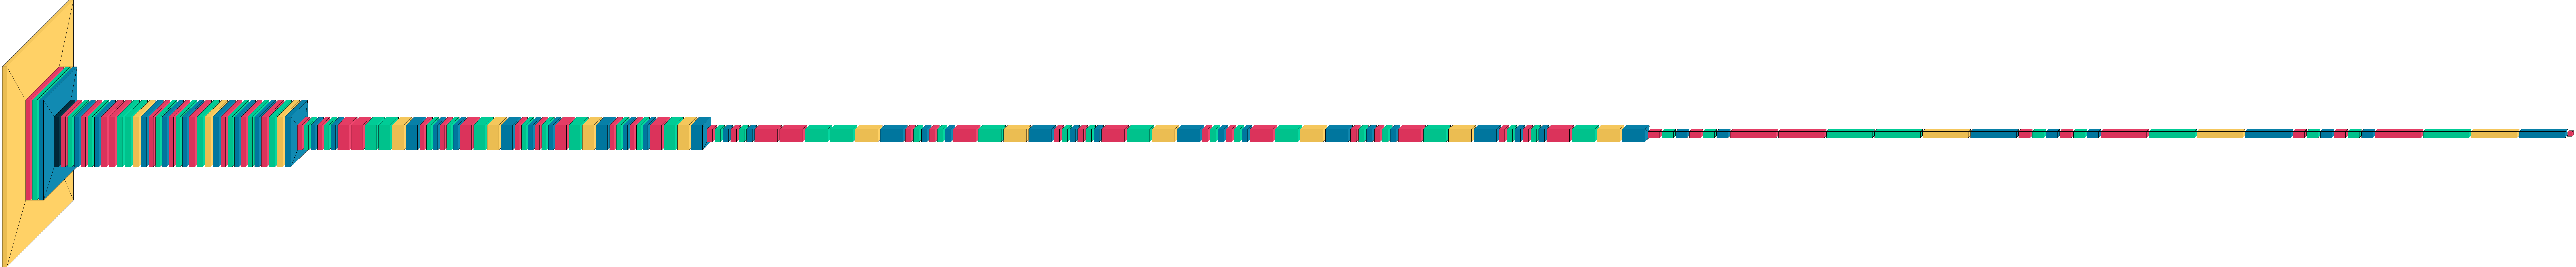

In [20]:
import visualkeras
visualkeras.layered_view(model, type_ignore=[ ZeroPadding2D,BatchNormalization,Flatten,Dropout])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

**Fit the Model**

In [22]:
history = model.fit_generator(training_generator,validation_data = validation_generator,epochs = 20, verbose = 1)

Epoch 1/20
1304/1304 [==============================] - 167s 128ms/step - loss: 1.1256 - acc: 0.7734 - val_loss: 308.5234 - val_acc: 0.5000
Epoch 2/20
1304/1304 [==============================] - 125s 95ms/step - loss: 0.4729 - acc: 0.8426 - val_loss: 21.5826 - val_acc: 0.5000
Epoch 3/20
1304/1304 [==============================] - 122s 93ms/step - loss: 0.6526 - acc: 0.7404 - val_loss: 0.7064 - val_acc: 0.3750
Epoch 4/20
1304/1304 [==============================] - 121s 93ms/step - loss: 0.5764 - acc: 0.7128 - val_loss: 1.2563 - val_acc: 0.5000
Epoch 5/20
1304/1304 [==============================] - 122s 94ms/step - loss: 0.5540 - acc: 0.7220 - val_loss: 4.2784 - val_acc: 0.5000
Epoch 6/20
1304/1304 [==============================] - 122s 93ms/step - loss: 0.5345 - acc: 0.7375 - val_loss: 0.7245 - val_acc: 0.6250
Epoch 7/20
1304/1304 [==============================] - 121s 93ms/step - loss: 0.4742 - acc: 0.7730 - val_loss: 0.4589 - val_acc: 0.7500
Epoch 8/20
1304/1304 [===============

**Look at the training accuracy and val_accuracy,there is a huge difference between them
Sometimes,it gets val_accuracy gets stuck at a paticular constant value.
So,to prevent your model from these problems ,follow the upcoming steps**

In [23]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']

In [24]:
epochs = range(len(accuracy))
epochs

range(0, 20)

**Plots for Training Accuracy and validation Accuracy**

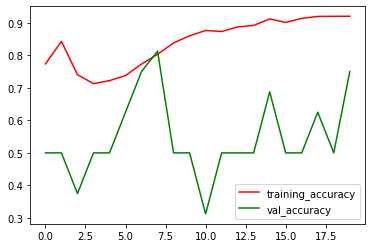

In [25]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()

Look at this Library ("preprocess_input") 

# Don't rescale your data 1/255. But rather use the preprocess_input function in your generator.
**The Keras ResNet pretrained weights are learned on a dataset with different preprocessing than Inception or VGG**

In [26]:
from keras.applications.resnet50 import preprocess_input

In [27]:
train_generator_2=ImageDataGenerator(preprocessing_function=preprocess_input,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
training_generator_2=train_generator_2.flow_from_directory(train_dir,target_size=(224,224),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [28]:
val_generator_2=ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator_2=val_generator_2.flow_from_directory(val_dir,target_size=(224,224),batch_size=12,class_mode='binary')

Found 16 images belonging to 2 classes.


In [29]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

In [30]:
early_stopper = EarlyStopping( patience = 10)
# checkpointer = ModelCheckpoint( monitor = 'val_loss', save_best_only = True, mode = 'auto')
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5,min_lr=0.001)

In [31]:
hist=model.fit_generator(training_generator_2,validation_data = validation_generator_2,epochs = 20, verbose = 1)

Epoch 1/20
1304/1304 [==============================] - 122s 93ms/step - loss: 0.2060 - acc: 0.9206 - val_loss: 0.5090 - val_acc: 0.7500
Epoch 2/20
1304/1304 [==============================] - 122s 93ms/step - loss: 0.1501 - acc: 0.9459 - val_loss: 0.3579 - val_acc: 0.7500
Epoch 3/20
1304/1304 [==============================] - 123s 94ms/step - loss: 0.1164 - acc: 0.9576 - val_loss: 0.3120 - val_acc: 0.8750
Epoch 4/20
1304/1304 [==============================] - 122s 94ms/step - loss: 0.1088 - acc: 0.9597 - val_loss: 0.1450 - val_acc: 0.9375
Epoch 5/20
1304/1304 [==============================] - 124s 95ms/step - loss: 0.0994 - acc: 0.9624 - val_loss: 0.0822 - val_acc: 1.0000
Epoch 6/20
1304/1304 [==============================] - 121s 93ms/step - loss: 0.0906 - acc: 0.9663 - val_loss: 0.0841 - val_acc: 1.0000
Epoch 7/20
1304/1304 [==============================] - 121s 93ms/step - loss: 0.0778 - acc: 0.9697 - val_loss: 0.0658 - val_acc: 1.0000
Epoch 8/20
1304/1304 [===================

In [32]:
accuracy_2=hist.history['acc']
loss_2=hist.history['loss']
val_accuracy_2=hist.history['val_acc']
val_loss_2=hist.history['val_loss']

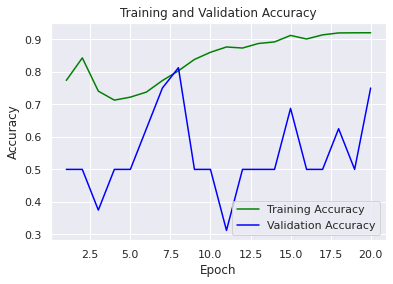

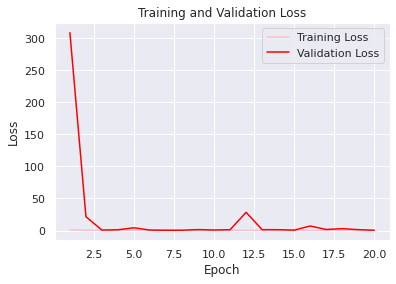

In [34]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Look at the validation accuracy ,It Surprisingly increase to more than 90%**

**Here the validation accuracy increases to more than 90% i.e. good **

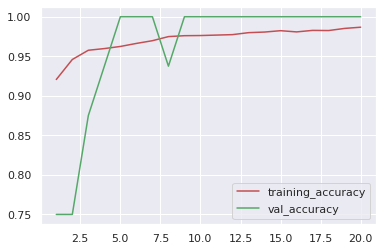

In [35]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy_2,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy_2,'g',label='val_accuracy')
plt.legend()
plt.show()

In [36]:
class_dict = training_generator_2.class_indices
print(class_dict)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [37]:
li = list(class_dict.keys())
print(li)

['NORMAL', 'PNEUMONIA']


Following is our prediction:


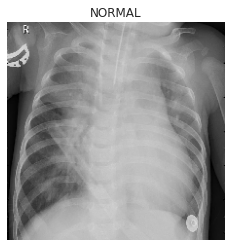

In [40]:
 #predicting an image

from keras.preprocessing import image
import numpy as np
image_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/person96_bacteria_464.jpeg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()